<a href="https://colab.research.google.com/github/JiaminJIAN/Research/blob/master/Platoon%20control/platoon_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Platoon control**

### **Introduction**

For $i = 0$, the state of the system governed by

\begin{cases}
    d P_{0}(t) = V_{0}(t) \, d t + \sigma_{1} \, d W_{1}(t) \\
    d V_{0}(t) = u_{0}(t) \, d t + \sigma_{2} \, d W_{2}(t)
\end{cases}

where $W_{1}(t)$ and $W_{2}(t)$ are standard Brownian motions and they are independent of each other.

Since we got the optimal control

$$u_{0}^{*}(x, t) = - \varphi (T - t) (x_{0,2} - \nu),$$

where 

$$\varphi(t) = \frac{e^{2t} - 1}{e^{2t} + 1}.$$

By the Euler method, we devide the time interval $[0, T]$ into $N$ segments and set $h = \frac{T}{N}$, then we have

\begin{cases}
    P_{0}((i+1)h) = P_{0}(ih) + V_{0}(ih) h + \sigma_{1} \sqrt{h} Z_{i} \\
    V_{0}((i+1)h) = V_{0}(ih) - \varphi(T - ih) (V_{0}(ih) - \nu) h + \sigma_{2} \sqrt{h} X_{i}
\end{cases}

where $i = 0, 1, \dots, N-1$ and ${X}_{i}, Z_{i}$ are independent standard normal variables.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import plt

In [2]:
## Parameters

P0_0 = 1
V0_0 = 20
nu = 70
sigma_1 = 1
sigma_2 = 1
T = 3
N = 100

In [3]:
def varphi(t):
  value = (np.exp(2*t) - 1) / (np.exp(2*t) + 1)
  return value

In [4]:
def path_n0(P0_0, V0_0, nu, sigma_1, sigma_2, T, N):
    t = np.linspace(0, T, num = N+1)
    h = T/N  
    P0 = P0_0 + np.zeros(N+1)  
    V0 = V0_0 + np.zeros(N+1)            
    for i in range(N):
        V0[i+1] = V0[i] - varphi(T-i*h) * (V0[i] - nu) * h + sigma_2 * np.sqrt(h) * np.random.normal()
        P0[i+1] = P0[i] + V0[i] * h + sigma_1 * np.sqrt(h) * np.random.normal()
    return t, V0, P0

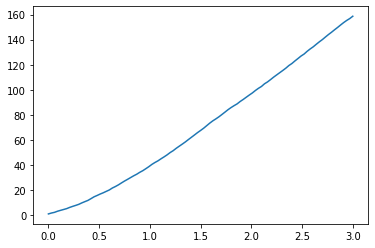

In [5]:
[t, V0, P0] = path_n0(P0_0, V0_0, nu, sigma_1, sigma_2, T, N)
plt.plot(t,P0)

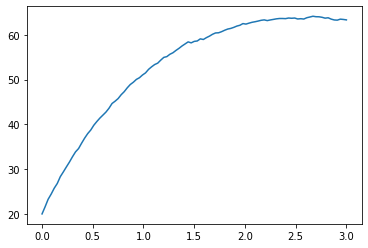

In [6]:
plt.plot(t,V0)

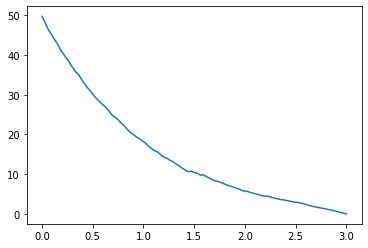

In [7]:
u = - varphi(T-t) * (V0 - nu)
plt.plot(t,u)

When $N=1$, there are two vehicles in the platoon system. We suppose the optimal strategy of the second vehicle is 

$$u_{1}^{*} (x, t) = - \varphi (T - t) (x_{1,2} - x_{0,2})$$

Similarly, by the Euler method, we devide the time interval $[0, T]$ into $N$ segments and set $h = \frac{T}{N}$, then we have

\begin{cases}
    P_{1}((i+1)h) = P_{1}(ih) + V_{1}(ih) h + \sigma_{1} \sqrt{h} Z_{i} \\
    V_{1}((i+1)h) = V_{1}(ih) - \varphi(T - ih) (V_{1}(ih) - V_{0}(ih)) h + \sigma_{2} \sqrt{h} X_{i}
\end{cases}

where $i = 0, 1, \dots, N-1$ and ${X}_{i}, Z_{i}$ are independent standard normal variables.

In [8]:
def path_n1(P1_0, V1_0, P0_0, V0_0, nu, sigma_1, sigma_2, T, N):
    t = np.linspace(0, T, num = N+1)
    h = T/N  
    P1 = P1_0 + np.zeros(N+1)  
    V1 = V1_0 + np.zeros(N+1)
    [t, V0, P0] = path_n0(P0_0, V0_0, nu, sigma_1, sigma_2, T, N)            
    for i in range(N):
        V1[i+1] = V1[i] - varphi(T-i*h) * (V1[i] - V0[i]) * h + sigma_2 * np.sqrt(h) * np.random.normal()
        P1[i+1] = P1[i] + V1[i] * h + sigma_1 * np.sqrt(h) * np.random.normal()
    return t, V1, P1

In [9]:
## Parameters

P1_0 = 0
V1_0 = 20

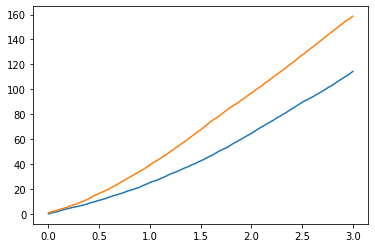

In [10]:
[t, V1, P1] = path_n1(P1_0, V1_0, P0_0, V0_0, nu, sigma_1, sigma_2, T, N)
plt.plot(t,P1)
plt.plot(t,P0)

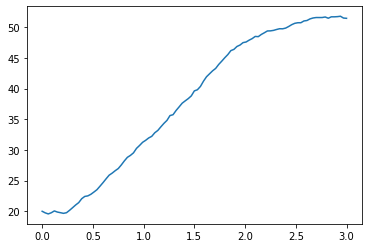

In [11]:
plt.plot(t,V1)

In [12]:
def velocity_matrix(v, nu, sigma_1, sigma_2, T, N, M):
    t = np.linspace(0, T, num = N+1)
    h = T/N
    V = np.zeros([M, N+1])
    V[:,0] = v
    for i in range(N):
        V[0,i+1] = V[0,i] - varphi(T-i*h) * (V[0,i] - nu) * h + sigma_2 * np.sqrt(h) * np.random.normal()
        for j in range(1, M):
            V[j,i+1] = V[j,i] - varphi(T-i*h) * (V[j,i] - V[j-1,i]) * h + sigma_2 * np.sqrt(h) * np.random.normal()
    return V

In [13]:
## Parameters

M = 10
v = np.zeros(M, order = 'F') + 20

V = velocity_matrix(v, nu, sigma_1, sigma_2, T, N, M)

print(V)

[[20.         21.44430214 22.7980866  ... 65.75265007 65.82837619
  65.67592635]
 [20.         20.09285825 20.30624419 ... 55.38572464 55.58868604
  55.34215573]
 [20.         20.01717682 20.19462068 ... 41.05306001 41.00526475
  41.14392199]
 ...
 [20.         19.819536   19.89725797 ... 19.61258609 19.36246601
  19.38152804]
 [20.         19.86781669 19.8821631  ... 19.1522844  19.38366476
  19.23612666]
 [20.         20.23345862 20.22564925 ... 21.24675116 21.19415925
  21.34904717]]


In [14]:
def position_matrix(p, v, nu, sigma_1, sigma_2, T, N, M):
    t = np.linspace(0, T, num = N+1)
    h = T/N
    V = velocity_matrix(v, nu, sigma_1, sigma_2, T, N, M)
    P = np.zeros([M, N+1])
    P[:,0] =p
    for j in range(M):
        for i in range(N):
            P[j,i+1] = P[j,i] + V[j,i] * h + sigma_1 * np.sqrt(h) * np.random.normal()
    return P

In [15]:
## parameters

p = np.arange(1, 0, -0.1)
P = position_matrix(p, v, nu, sigma_1, sigma_2, T, N, M)
print(P)

[[1.00000000e+00 1.73672136e+00 2.37770144e+00 ... 1.53614352e+02
  1.55632705e+02 1.57611221e+02]
 [9.00000000e-01 1.47122219e+00 1.96142655e+00 ... 1.15938781e+02
  1.17569569e+02 1.19224510e+02]
 [8.00000000e-01 1.32284334e+00 1.81772285e+00 ... 8.67722426e+01
  8.81824715e+01 8.93908480e+01]
 ...
 [3.00000000e-01 8.97290979e-01 1.46944077e+00 ... 5.86063140e+01
  5.91661529e+01 5.99678077e+01]
 [2.00000000e-01 8.09795069e-01 1.36238387e+00 ... 5.94278314e+01
  5.98815236e+01 6.01668408e+01]
 [1.00000000e-01 5.24959965e-01 1.47407383e+00 ... 6.26643446e+01
  6.30632960e+01 6.39931475e+01]]


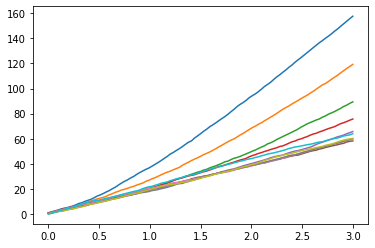

In [16]:
for i in range(10): 
    plt.plot(t,P[i])